<a href="https://colab.research.google.com/github/suryateja20031104/Praying-Mantis-MS1/blob/main/MLCodes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OLS

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes

x=[2,3,5,13,8,16,11,1,9]
y=[15,28,42,64,50,90,58,8,54]
diabetes = load_diabetes()
data = pd.DataFrame(diabetes.data, columns=[f'feature_{i}' for i in range(diabetes.data.shape[1])])
data['target'] = diabetes.target
x = data['feature_2']
y = data['target']

x_ = round(np.mean(x),2)
y_ = round(np.mean(y),2)
x__x = x - x_
y__y = y - y_
xy = np.dot(x__x.T,y__y)

m = xy/sum((x__x)**2)
b = y_ - m* x_
print(m,b)


949.4352603840383 152.13


Linear Regression

2.826892353899737
[9.68207815]
   Actual  Predicted
0      81  83.188141
1      30  27.032088
2      21  27.032088
3      76  69.633232
4      62  59.951153
Mean absolute error: 3.92
Mean squared error: 18.94
Root mean squared error: 4.35


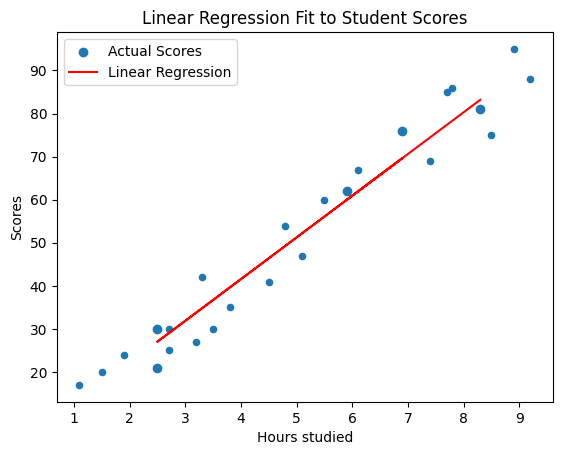

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

df = pd.read_csv("student_scores.csv")
df.plot.scatter(x='Hours', y='Scores')

y = df['Scores'].values
X = df['Hours'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(X_test)
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

plt.scatter(X_test, y_test, label='Actual Scores')
plt.plot(X_test, y_pred, color='red', label='Linear Regression')

plt.xlabel('Hours studied')
plt.ylabel('Scores')
plt.title('Linear Regression Fit to Student Scores')
plt.legend()
plt.show()


Gradient Descent

Final Theta: [152.12405328  45.20833777]


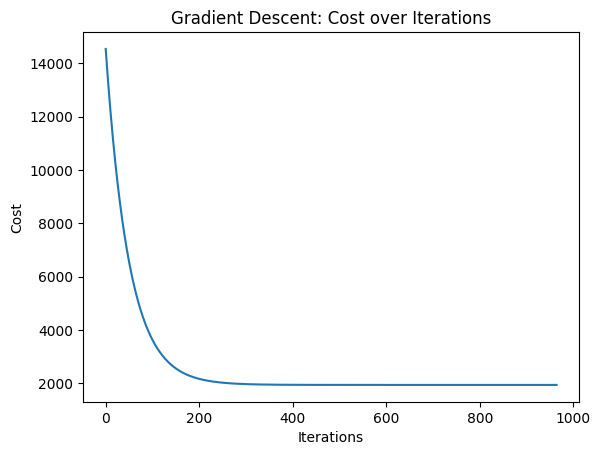

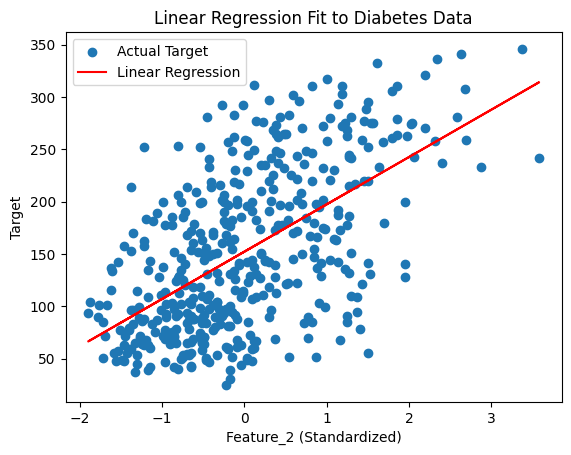

R-squared: 0.34392374384532354


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


def compute_cost(X, Y, theta):
  H = np.dot(X, theta)
  difference = H - Y
  m = len(X)
  J = (1/(2*m))*np.dot(difference.T, difference)
  return np.squeeze(J)

def gradient_of_cost_function(X, Y, theta):
  H = np.dot(X, theta)
  difference =  H - Y
  m = len(X)
  d_theta = (1/m) * (np.dot(X.T,difference))
  return d_theta

def gradient_descent(X, Y, theta, cost_diff_threshold, learning_rate):
  thetas = [theta]
  costs = [compute_cost(X, Y, theta)]
  cost_diff = cost_diff_threshold + 1
  i = 0
  while(abs(cost_diff) > cost_diff_threshold):
      d_theta = gradient_of_cost_function(X, Y, theta)
      theta = theta - (learning_rate * d_theta)
      costs.append(compute_cost(X, Y, theta))
      thetas.append(theta)
      cost_diff = costs[i+1] - costs[i]
      if(cost_diff > 0):
          print("Diverging at iter:",i)
          break
      i+=1
  return thetas, costs

diabetes = load_diabetes()
data = pd.DataFrame(diabetes.data, columns=[f'feature_{i}' for i in range(diabetes.data.shape[1])])
data['target'] = diabetes.target

X = data[['feature_2']]
y = data['target']

X = (X - X.mean()) / X.std()

X = np.column_stack((np.ones(X.shape[0]), X))

y = np.array(y)

theta = np.zeros(X.shape[1])

learning_rate = 0.01
cost_diff_threshold = 1e-6


thetas, costs = gradient_descent(X, y, theta, cost_diff_threshold, learning_rate)

final_theta = thetas[-1]
print("Final Theta:", final_theta)

plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent: Cost over Iterations')
plt.show()

plt.scatter(X[:, 1], y, label='Actual Target')
plt.plot(X[:, 1], np.dot(X, final_theta), color='red', label='Linear Regression')

plt.xlabel('Feature_2 (Standardized)')
plt.ylabel('Target')
plt.title('Linear Regression Fit to Diabetes Data')
plt.legend()
plt.show()

mean_y = np.mean(y)
ss_total = np.sum((y - mean_y) ** 2)
ss_residual = np.sum((y - np.dot(X, final_theta)) ** 2)
r2 = 1 - (ss_residual / ss_total)

print("R-squared:", r2)


Quadratic Regression

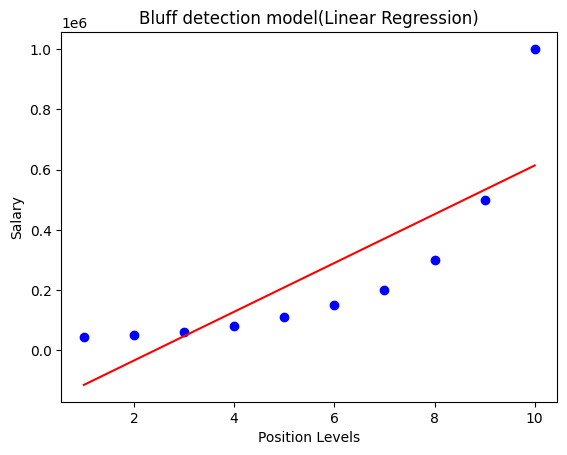

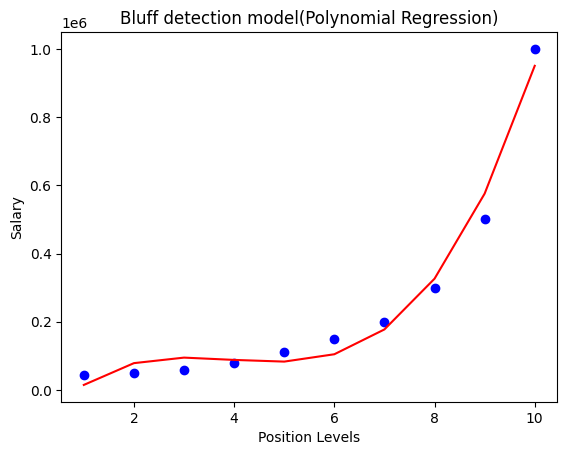

[     0.         180664.33566432 -48548.95104895   4120.04662005]


In [ ]:
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

data_set= pd.read_csv('Position_Salaries.csv')
x= data_set.iloc[:, 1:2].values.reshape(-1,1)
y= data_set.iloc[:, 2].values

from sklearn.linear_model import LinearRegression
lin_regs= LinearRegression()
lin_regs.fit(x,y)

from sklearn.preprocessing import PolynomialFeatures
poly_regs= PolynomialFeatures(degree= 3)
x_poly= poly_regs.fit_transform(x)
lin_reg_2 =LinearRegression()
lin_reg_2.fit(x_poly, y)

mtp.scatter(x,y,color="blue")
mtp.plot(x,lin_regs.predict(x), color="red")
mtp.title("Bluff detection model(Linear Regression)")
mtp.xlabel("Position Levels")
mtp.ylabel("Salary")
mtp.show()

mtp.scatter(x,y,color="blue")
mtp.plot(x, lin_reg_2.predict(x_poly), color="red")
mtp.title("Bluff detection model(Polynomial Regression)")
mtp.xlabel("Position Levels")
mtp.ylabel("Salary")
mtp.show()

print(lin_reg_2.coef_)

Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("pima-indians-diabetes.csv",names=col_names)

feature_cols = ['pregnant']
X = pima[feature_cols]
y = pima.label


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=16)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(logreg.predict([[11]]))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
metrics.accuracy_score(y_pred,y_test)




FileNotFoundError: ignored

SVM

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

cancer = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print(metrics.r2_score(y_test,y_pred))
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

Accuracy: 0.9649122807017544
Precision: 0.9811320754716981
Recall: 0.9629629629629629
0.8492063492063492
     Actual  Predicted
0         1          1
1         1          1
2         0          0
3         0          0
4         1          1
..      ...        ...
166       1          1
167       0          0
168       1          1
169       1          1
170       1          1

[171 rows x 2 columns]


Decision Trees

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names)
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols]
y = pima.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

Accuracy: 0.7619047619047619
     Actual  Predicted
302       0          0
131       1          0
124       1          0
486       0          1
306       1          0
..      ...        ...
612       1          1
736       0          0
748       1          1
163       0          0
125       1          0

[231 rows x 2 columns]


Bagging using random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# n_estimators: Number of trees in the forest
# max_features: The number of features to consider when looking for the best split
rf_model = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

    Actual  Predicted
0        1          1
1        0          0
2        2          2
3        1          1
4        1          1
5        0          0
6        1          1
7        2          2
8        1          1
9        1          1
10       2          2
11       0          0
12       0          0
13       0          0
14       0          0
15       1          1
16       2          2
17       1          1
18       1          1
19       2          2
20       0          0
21       2          2
22       0          0
23       2          2
24       2          2
25       

K-Means

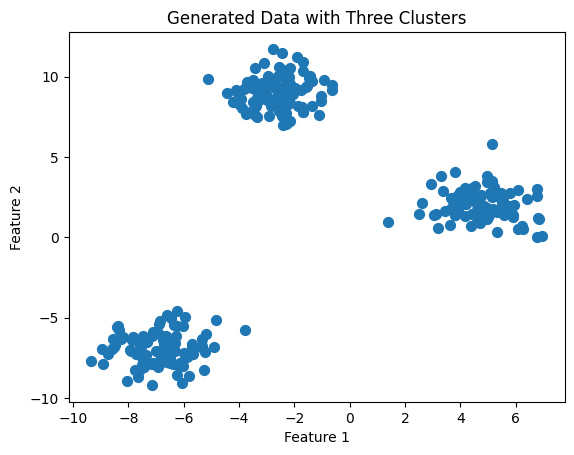

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


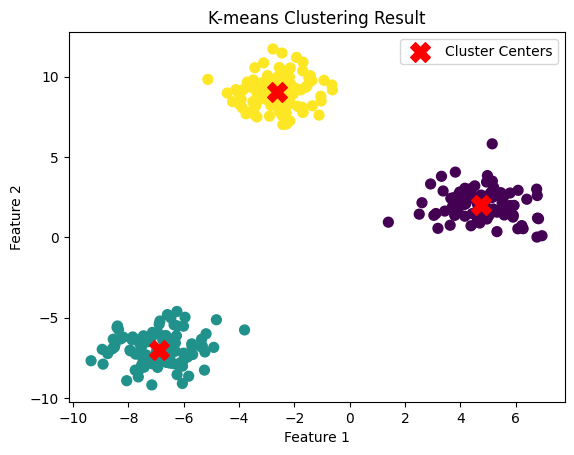

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

data, _ = make_blobs(n_samples=300, centers=3, random_state=42)

plt.scatter(data[:, 0], data[:, 1], s=50)
plt.title("Generated Data with Three Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)

centers = kmeans.cluster_centers_
labels = kmeans.labels_

plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')
plt.title("K-means Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


Implement DBSCAN clustering

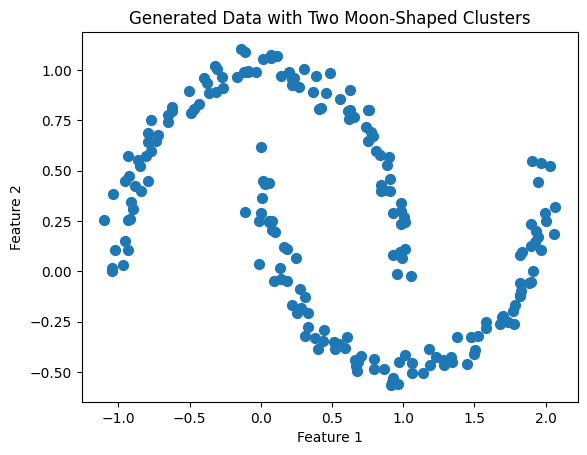

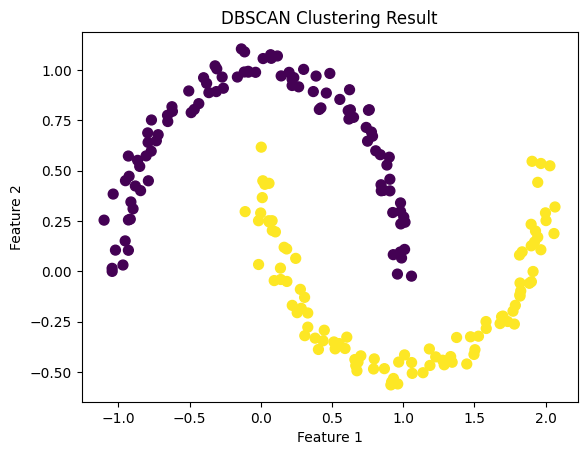

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

data, _ = make_moons(n_samples=200, noise=0.05, random_state=42)

plt.scatter(data[:, 0], data[:, 1], s=50)
plt.title("Generated Data with Two Moon-Shaped Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(data)

plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
plt.title("DBSCAN Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Solve the curse of dimensionality by implementing PCA algorithm on a high dimensional

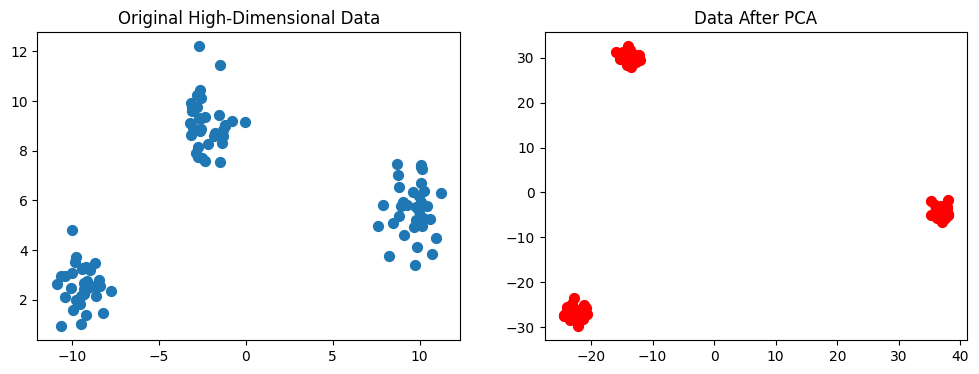

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

data, _ = make_blobs(n_samples=100, n_features=50, centers=3, random_state=42)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], s=50)
plt.title("Original High-Dimensional Data")

plt.subplot(1, 2, 2)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c='red',s=50)
plt.title("Data After PCA")

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy after PCA: 1.0


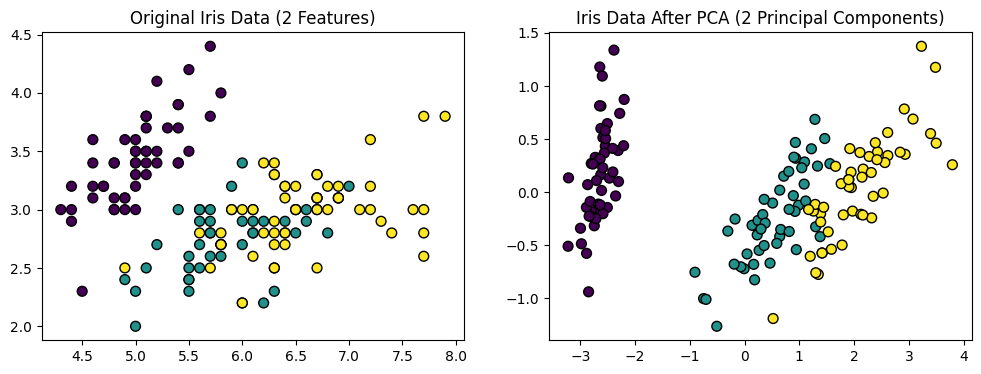

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

iris = load_iris()
data = iris.data
target = iris.target

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c=target, cmap='viridis', edgecolors='k', s=50)
plt.title("Original Iris Data (2 Features)")

plt.subplot(1, 2, 2)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=target, cmap='viridis', edgecolors='k', s=50)
plt.title("Iris Data After PCA (2 Principal Components)")

plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(data_pca, target, test_size=0.2, random_state=42)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after PCA:", accuracy)

Accuracy after PCA: 1.0


Comparison of Algos





In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

dt_classifier = DecisionTreeClassifier(random_state=41)
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=41)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)


print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")


Decision Tree Accuracy: 0.9111
Random Forest Accuracy: 0.9556


In [47]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
X = iris.data[:, :2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy*100)

print('Classification Report:')
print(classification_report(y_test, y_pred))
print(model.predict([[0.2,0.1]]))
print(confusion_matrix(y_test,y_pred))

Accuracy: 90.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

[1]
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


In [56]:
x=np.arange(1,11)
y=np.arange(40000,140000,10000)
df = pd.DataFrame({'X':x,'Y':y})
df

,X,Y
0,1,40000
1,2,50000
2,3,60000
3,4,70000
4,5,80000
5,6,90000
6,7,100000
7,8,110000
8,9,120000
9,10,130000


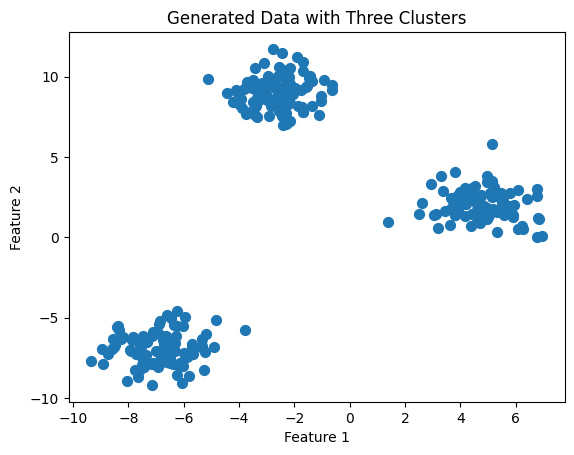

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

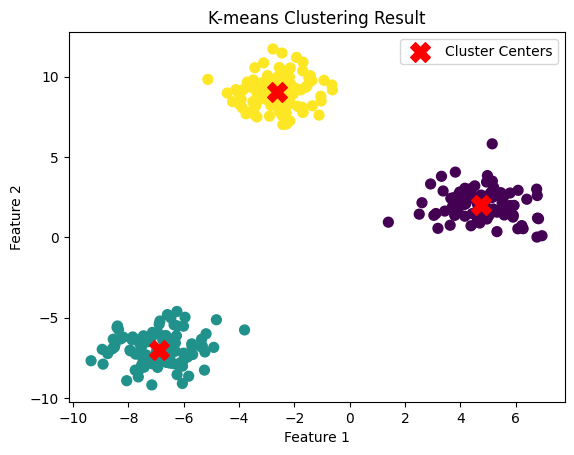

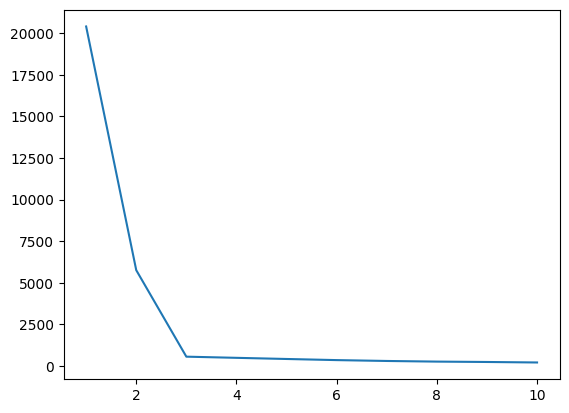

In [65]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

data, _ = make_blobs(n_samples=300, centers=3, random_state=42)
df = pd.DataFrame({'X':data[:,0],'Y':data[:,1]})
plt.scatter(data[:, 0], data[:, 1], s=50)
plt.title("Generated Data with Three Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i)
  km.fit_predict(df)
  wcss.append(km.inertia_)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)

centers = kmeans.cluster_centers_
labels = kmeans.labels_

plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')
plt.title("K-means Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()



plt.plot(range(1,11),wcss)
plt.show()
